In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
ents = [0.0, 0.01, 0.05, 0.1, 0.4, 0.8]
clips = [0.005, 0.02, 0.08, 0.2, 0.5, 0.8, 1e6]

In [3]:
def plot_svd(env_name, ents, clips, std_scale=0.1, y_maxr=None, y_maxp=None, tick=1, k=10):
    with open(f"./shared/weights/{env_name}_Wr.npy", 'rb') as f:
        Wr = np.load(f)
    with open(f"./shared/weights/{env_name}_Wp.npy", 'rb') as f:
        Wp = np.load(f)
        
    assert len(Wr.shape) == len(Wp.shape) == 5  # (n_seeds, n_ent, n_clip, d_out, d_in)
    assert Wr.shape[1:3] == Wp.shape[1:3] == (len(ents), len(clips))
    print("Wr shape:", Wr.shape)
    print("Wp shape:", Wp.shape)

    sWr = np.linalg.svd(Wr)[1]
    sWp = np.linalg.svd(Wp)[1]
    assert sWr.shape[1:3] == sWp.shape[1:3] == (len(ents), len(clips))
    print("sWr shape:", sWr.shape)
    print("sWp shape:", sWp.shape)
    print("Max sWr:", np.max(np.mean(sWr, axis=0)))
    print("Max sWp:", np.max(np.mean(sWp, axis=0)))

    # Normalize
    sWr /= np.max(sWr, axis=-1, keepdims=True)
    sWp /= np.max(sWp, axis=-1, keepdims=True)
    
    sWr = sWr[..., :k]
    sWp = sWp[..., :k]
    
    sWr = np.mean(sWr, axis=0)
    sWp = np.mean(sWp, axis=0)  
    
    print("\nSingular values of representation weight matrix")
    plt.figure(figsize=(24, 15))
    indices = range(sWr.shape[-1])
    for j in range(sWr.shape[0]):
        plt.subplot(2, 3, j+1)
        for k in range(sWr.shape[1]):
            sns.lineplot(x=indices, y=sWr[j, k, :], label=f"eps={clips[k] if clips[k]<1000 else None}")
        
        plt.xlabel("Index")
        plt.ylabel("Singular value")
        plt.ylim(top=y_maxr)
        plt.title(f"Ent. bonus={ents[j]}")
    plt.show()

#     print("\nSingular values of logit weight matrix")
#     plt.figure(figsize=(24, 15))
#     indices = range(sWp.shape[-1])
#     for j in range(sWp.shape[0]):
#         plt.subplot(2, 3, j+1)
#         for k in range(sWp.shape[1]):
#             sns.lineplot(x=indices, y=sWp[j, k, :], label=f"eps={clips[k] if clips[k]<1000 else None}")
        
#         plt.xlabel("Index")
#         plt.ylabel("Singular value")
#         plt.ylim(top=y_maxp)
#         plt.title(f"Ent. bonus={ents[j]}")
#     plt.show()
        
    return sWr, sWp

## 1. Acrobot

Wr shape: (8, 6, 7, 64, 64)
Wp shape: (8, 6, 7, 64, 3)
sWr shape: (8, 6, 7, 64)
sWp shape: (8, 6, 7, 3)
Max sWr: 10.296283
Max sWp: 2.1906056

Singular values of representation weight matrix


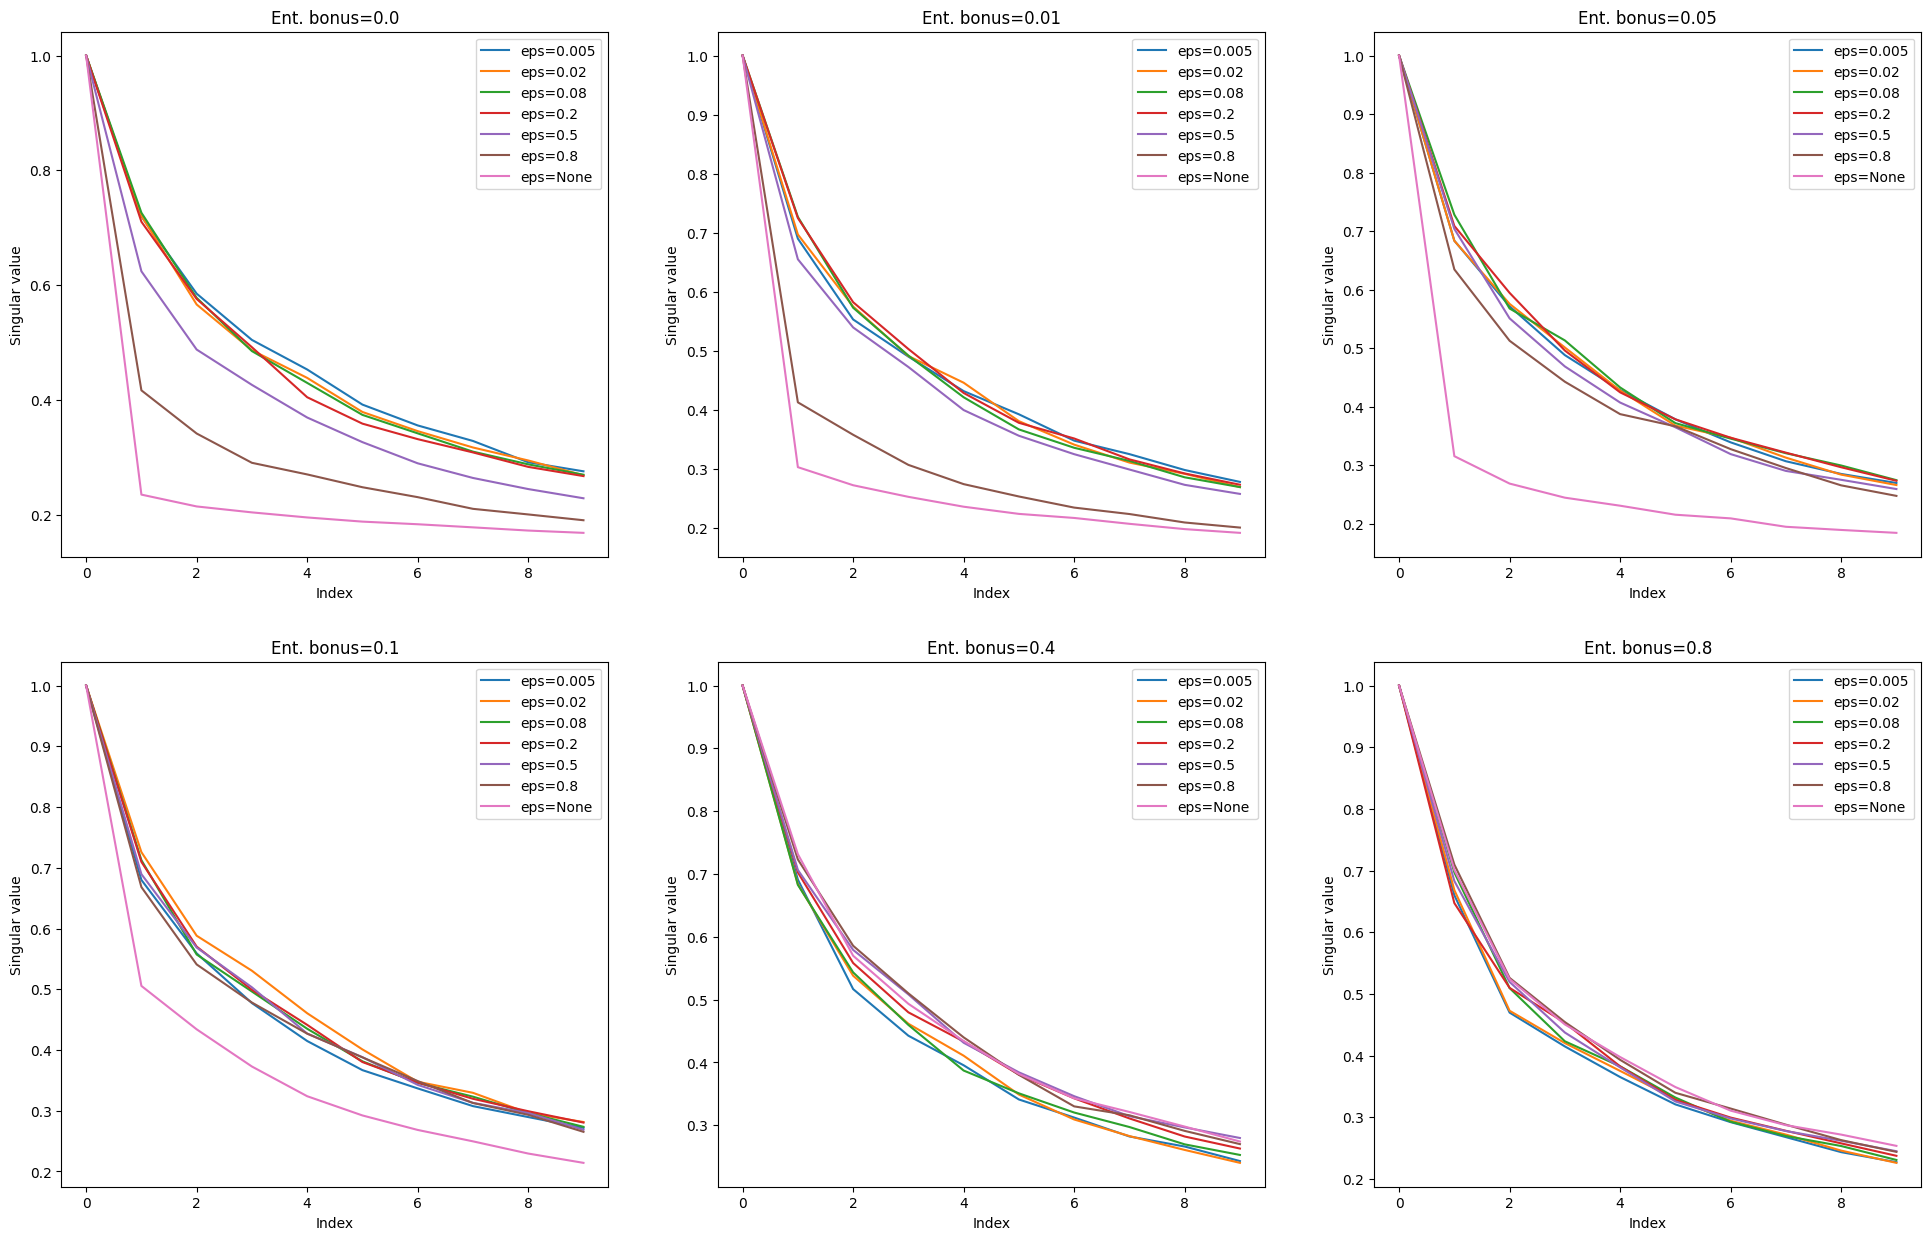

In [4]:
sWr, sWp = plot_svd("Acrobot-v1", ents, clips)

## 2. Asterix

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 5)
sWr shape: (8, 6, 7, 256)
sWp shape: (8, 6, 7, 5)
Max sWr: 31.533615
Max sWp: 13.271024

Singular values of representation weight matrix


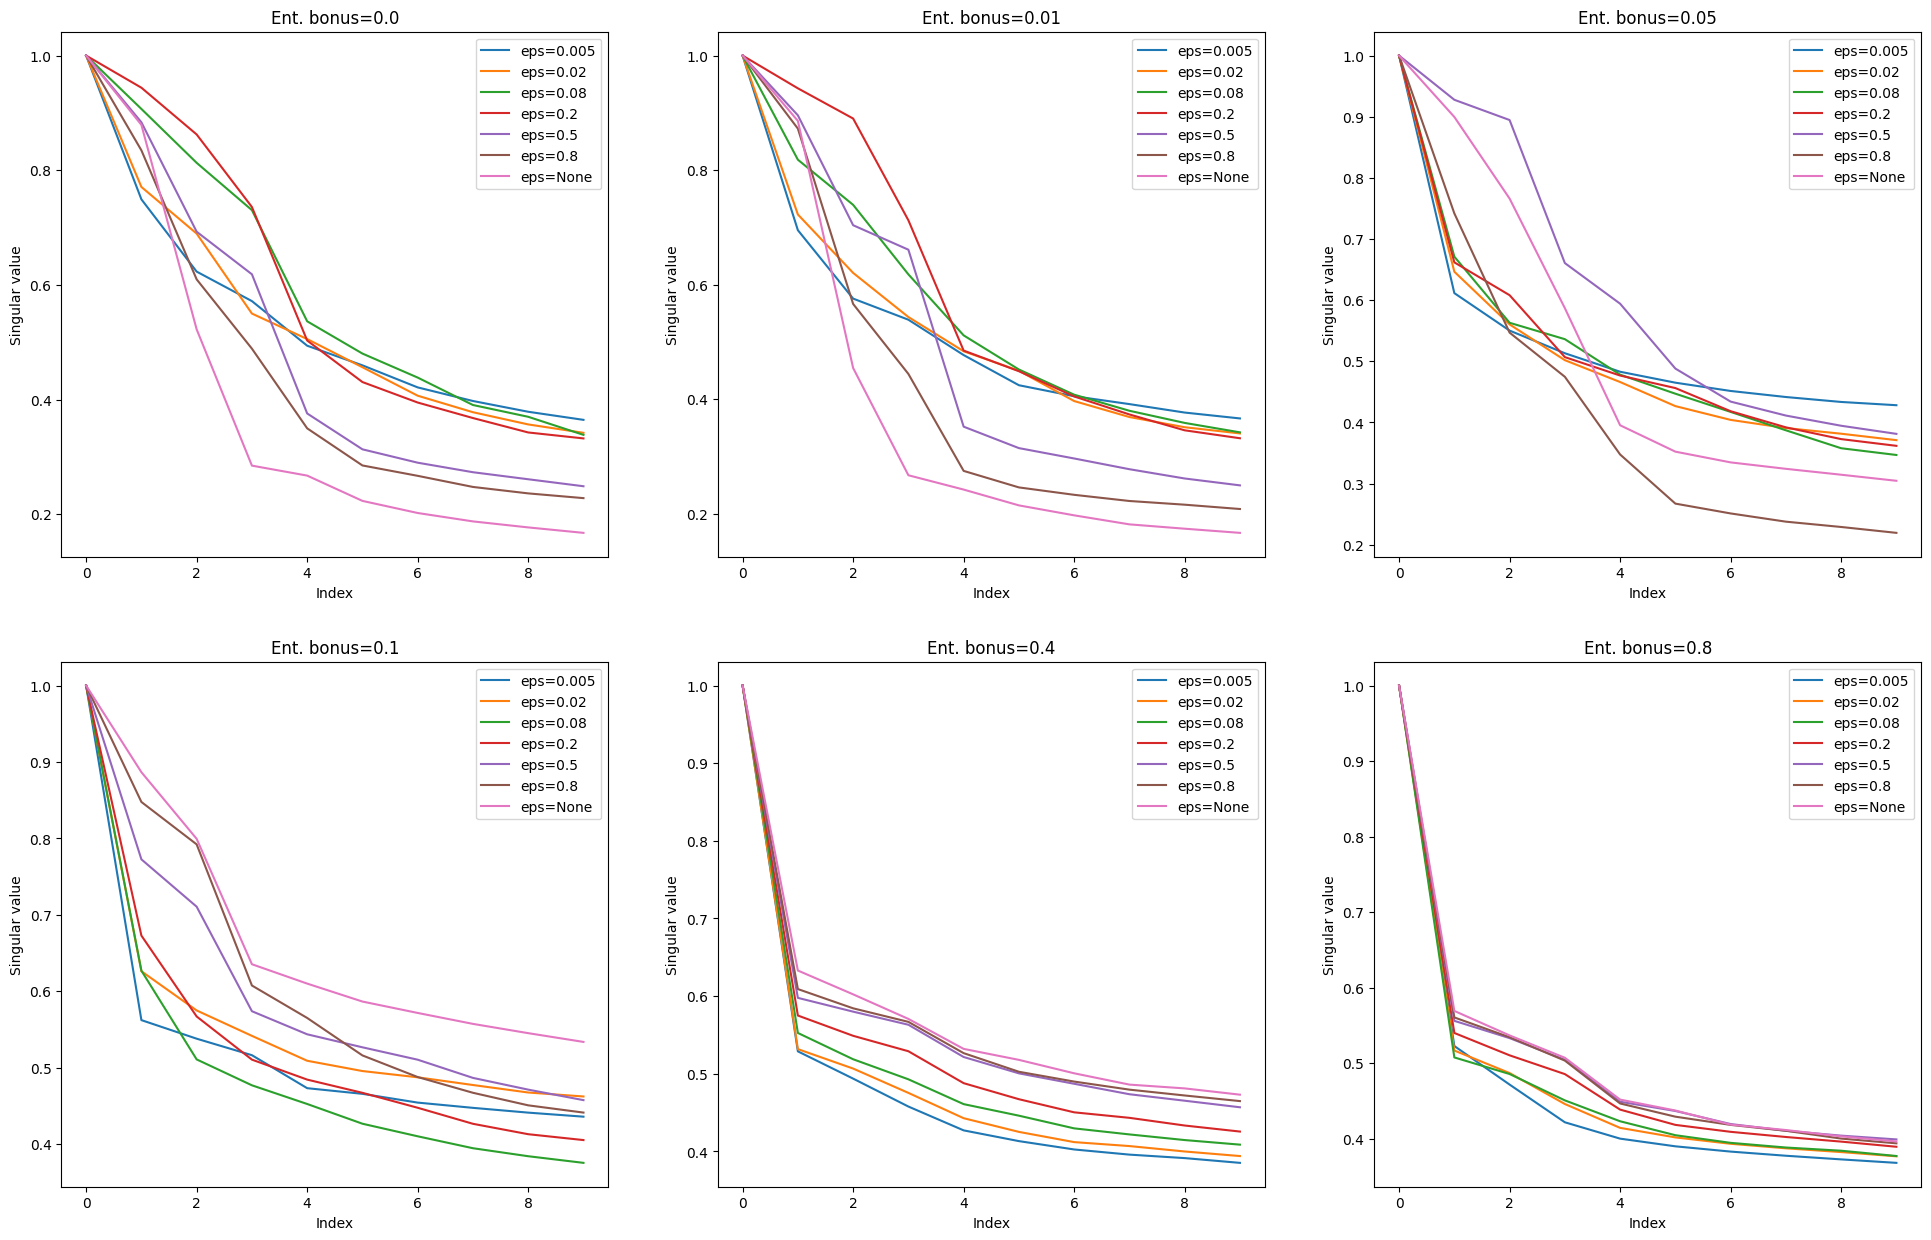

In [5]:
sWr, sWp = plot_svd("Asterix-MinAtar", ents, clips)

## 3. Breakout

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 3)
sWr shape: (8, 6, 7, 256)
sWp shape: (8, 6, 7, 3)
Max sWr: 33.16228
Max sWp: 10.700177

Singular values of representation weight matrix


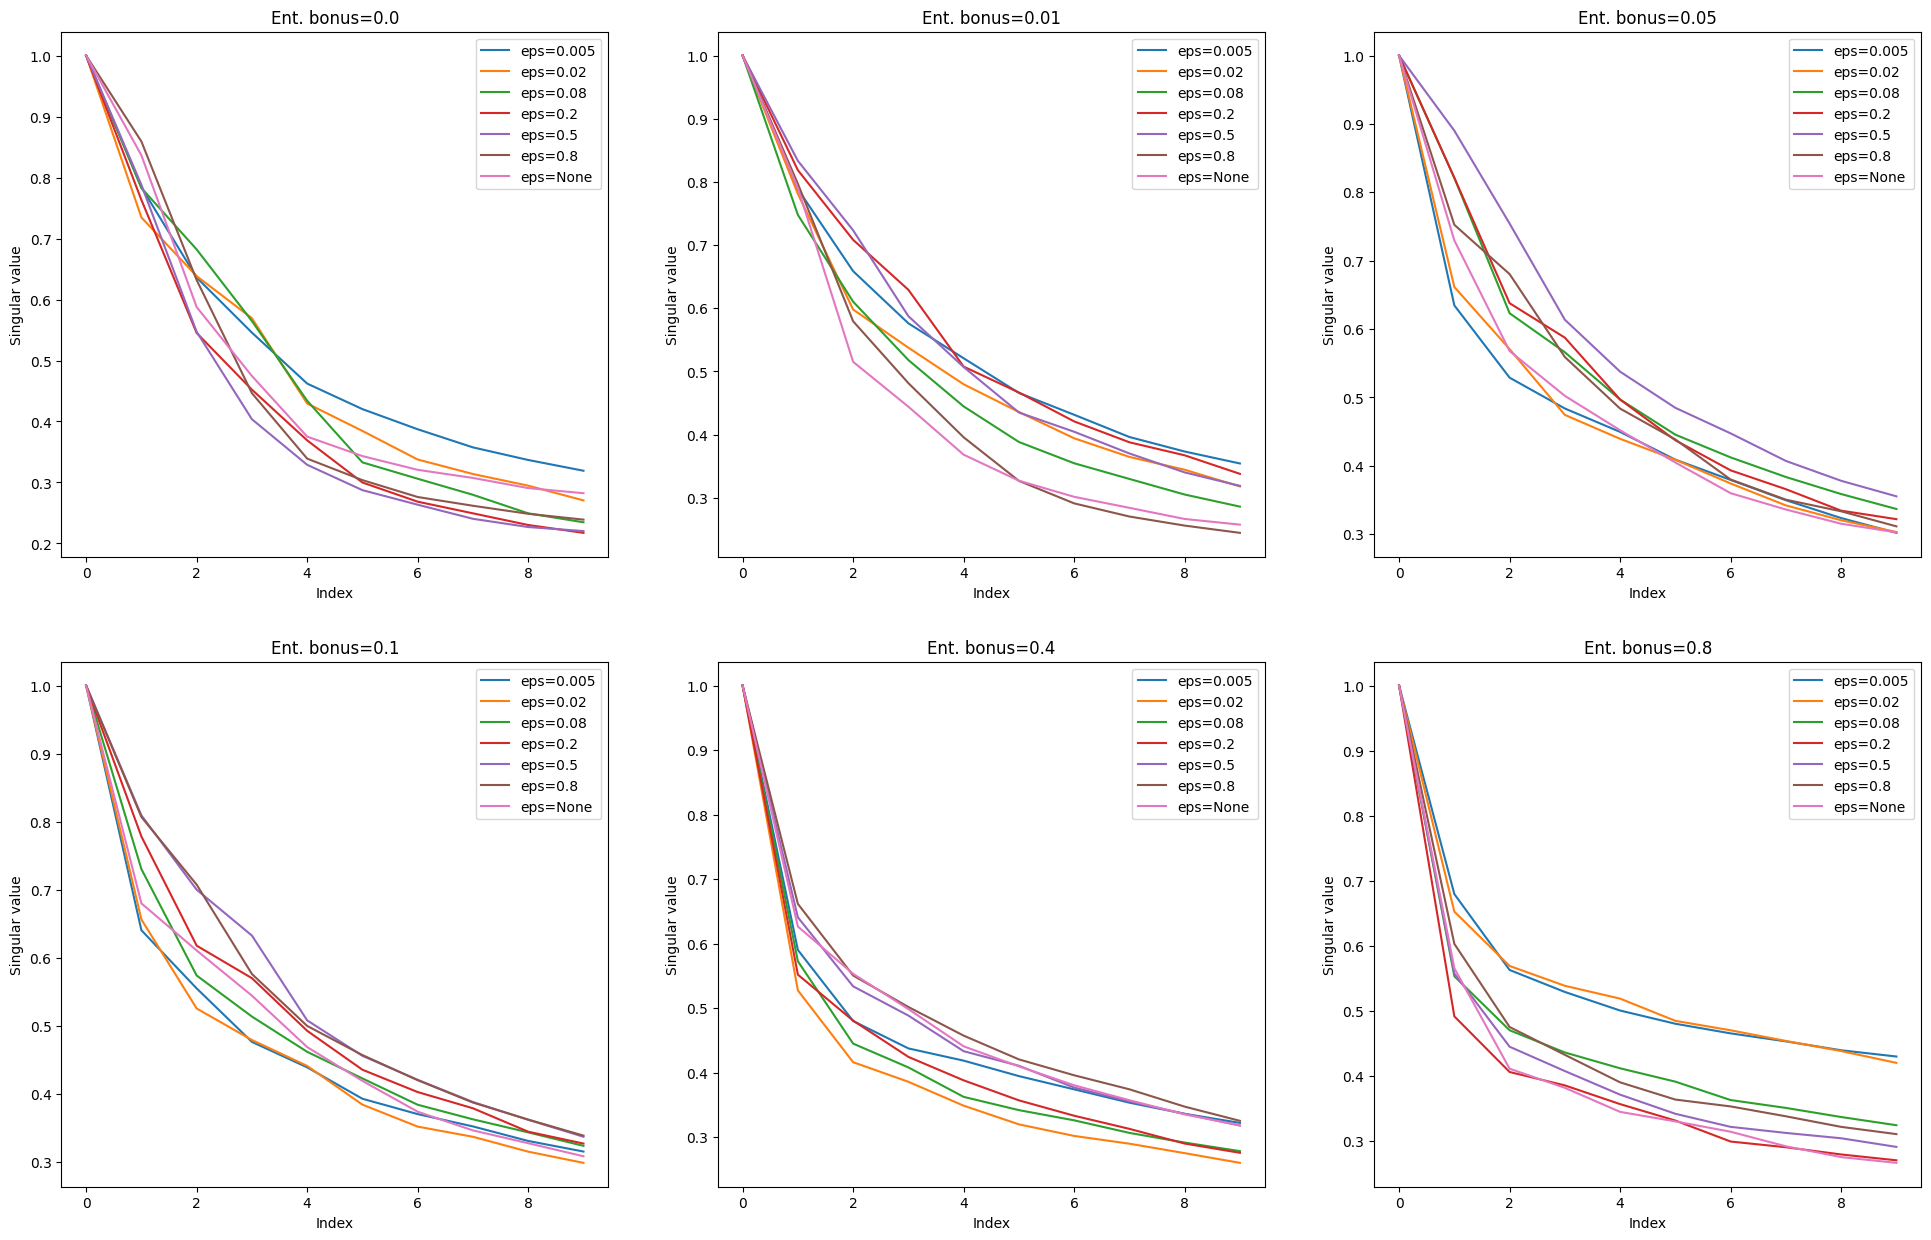

In [6]:
sWr, sWp = plot_svd("Breakout-MinAtar", ents, clips)

## 4. CartPole

Wr shape: (8, 6, 7, 64, 64)
Wp shape: (8, 6, 7, 64, 2)
sWr shape: (8, 6, 7, 64)
sWp shape: (8, 6, 7, 2)
Max sWr: 12.8833
Max sWp: 2.4603457

Singular values of representation weight matrix


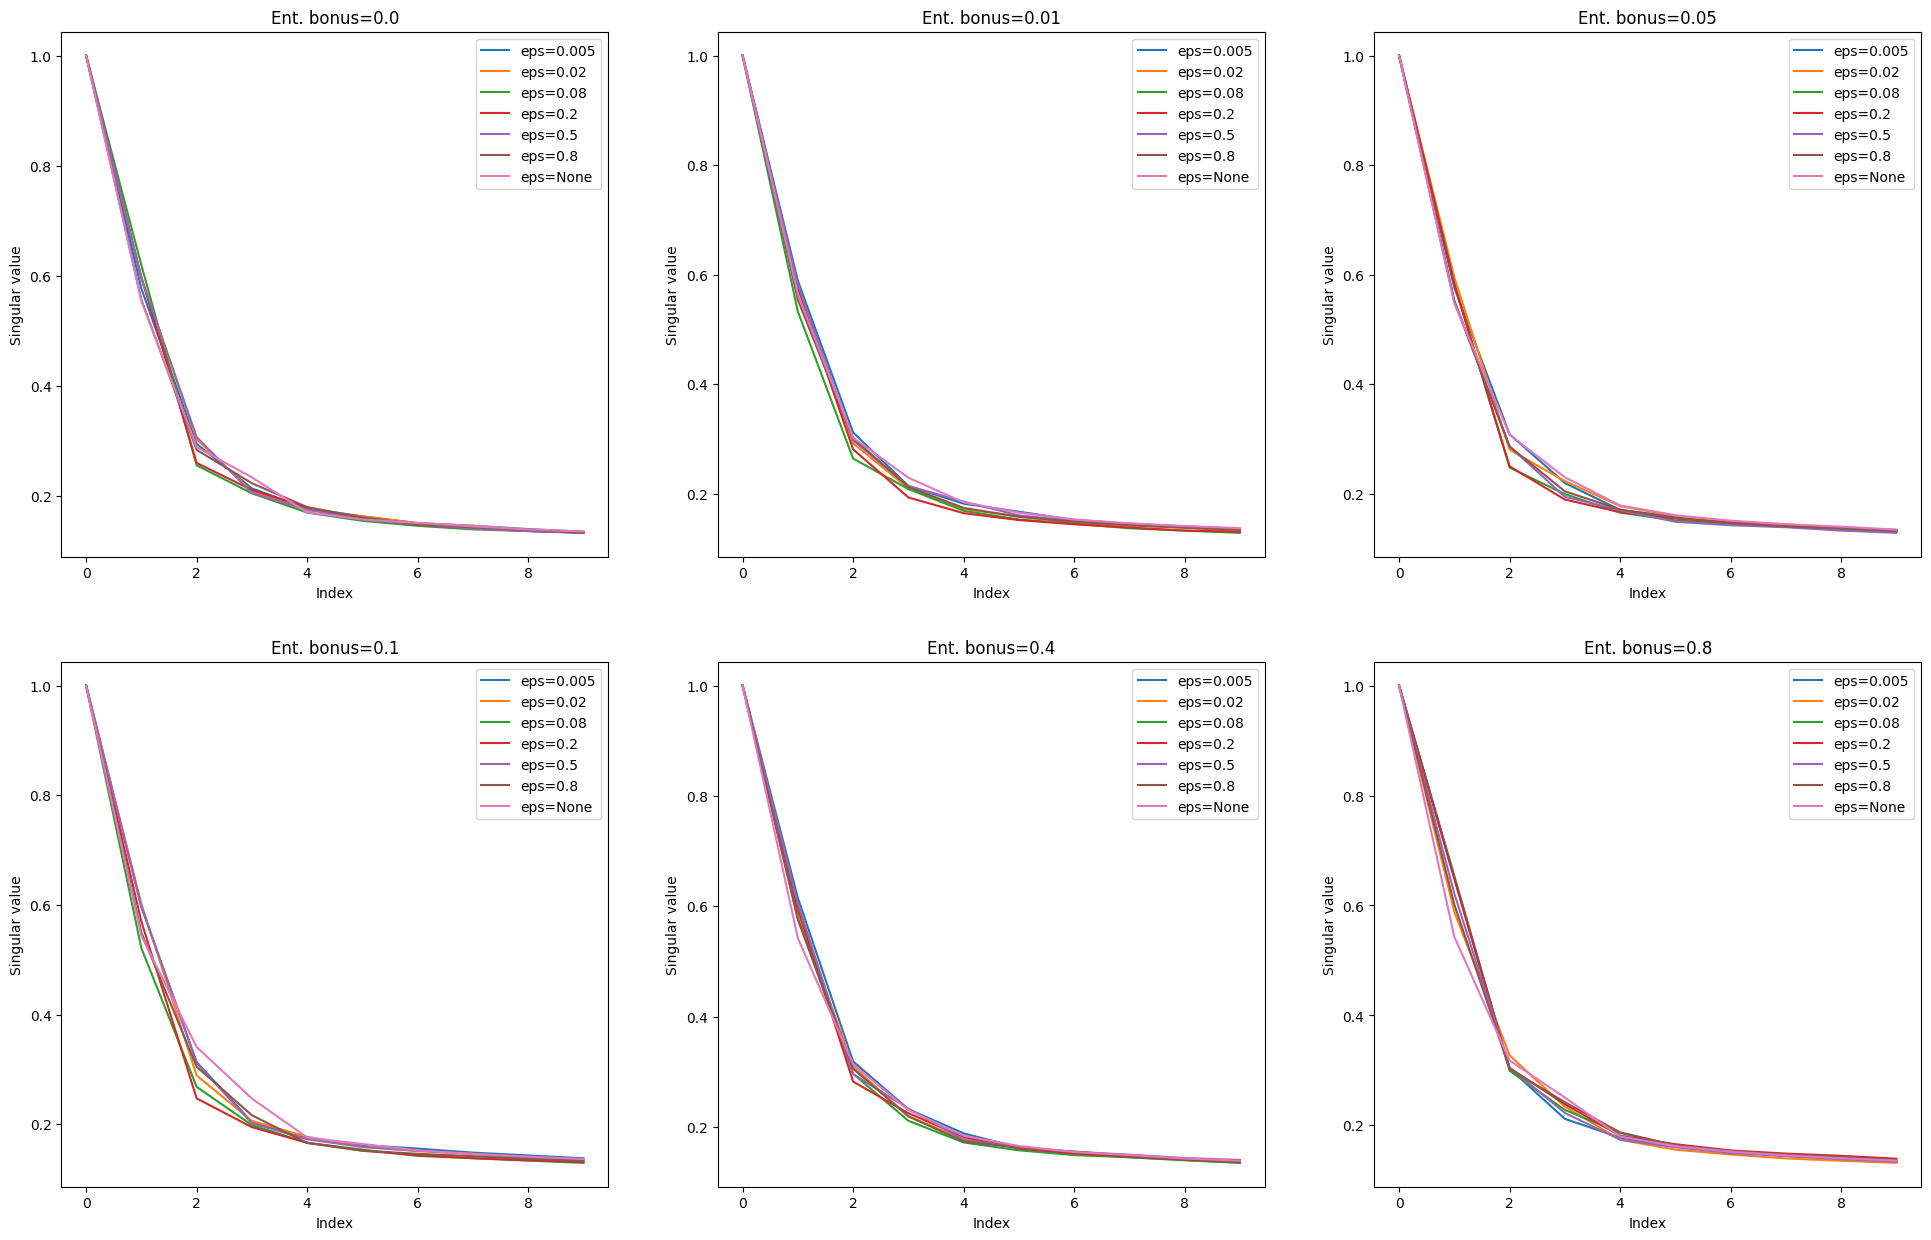

In [7]:
sWr, sWp = plot_svd("CartPole-v1", ents, clips)

## 5. Freeway

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 3)
sWr shape: (8, 6, 7, 256)
sWp shape: (8, 6, 7, 3)
Max sWr: 32.324413
Max sWp: 12.130011

Singular values of representation weight matrix


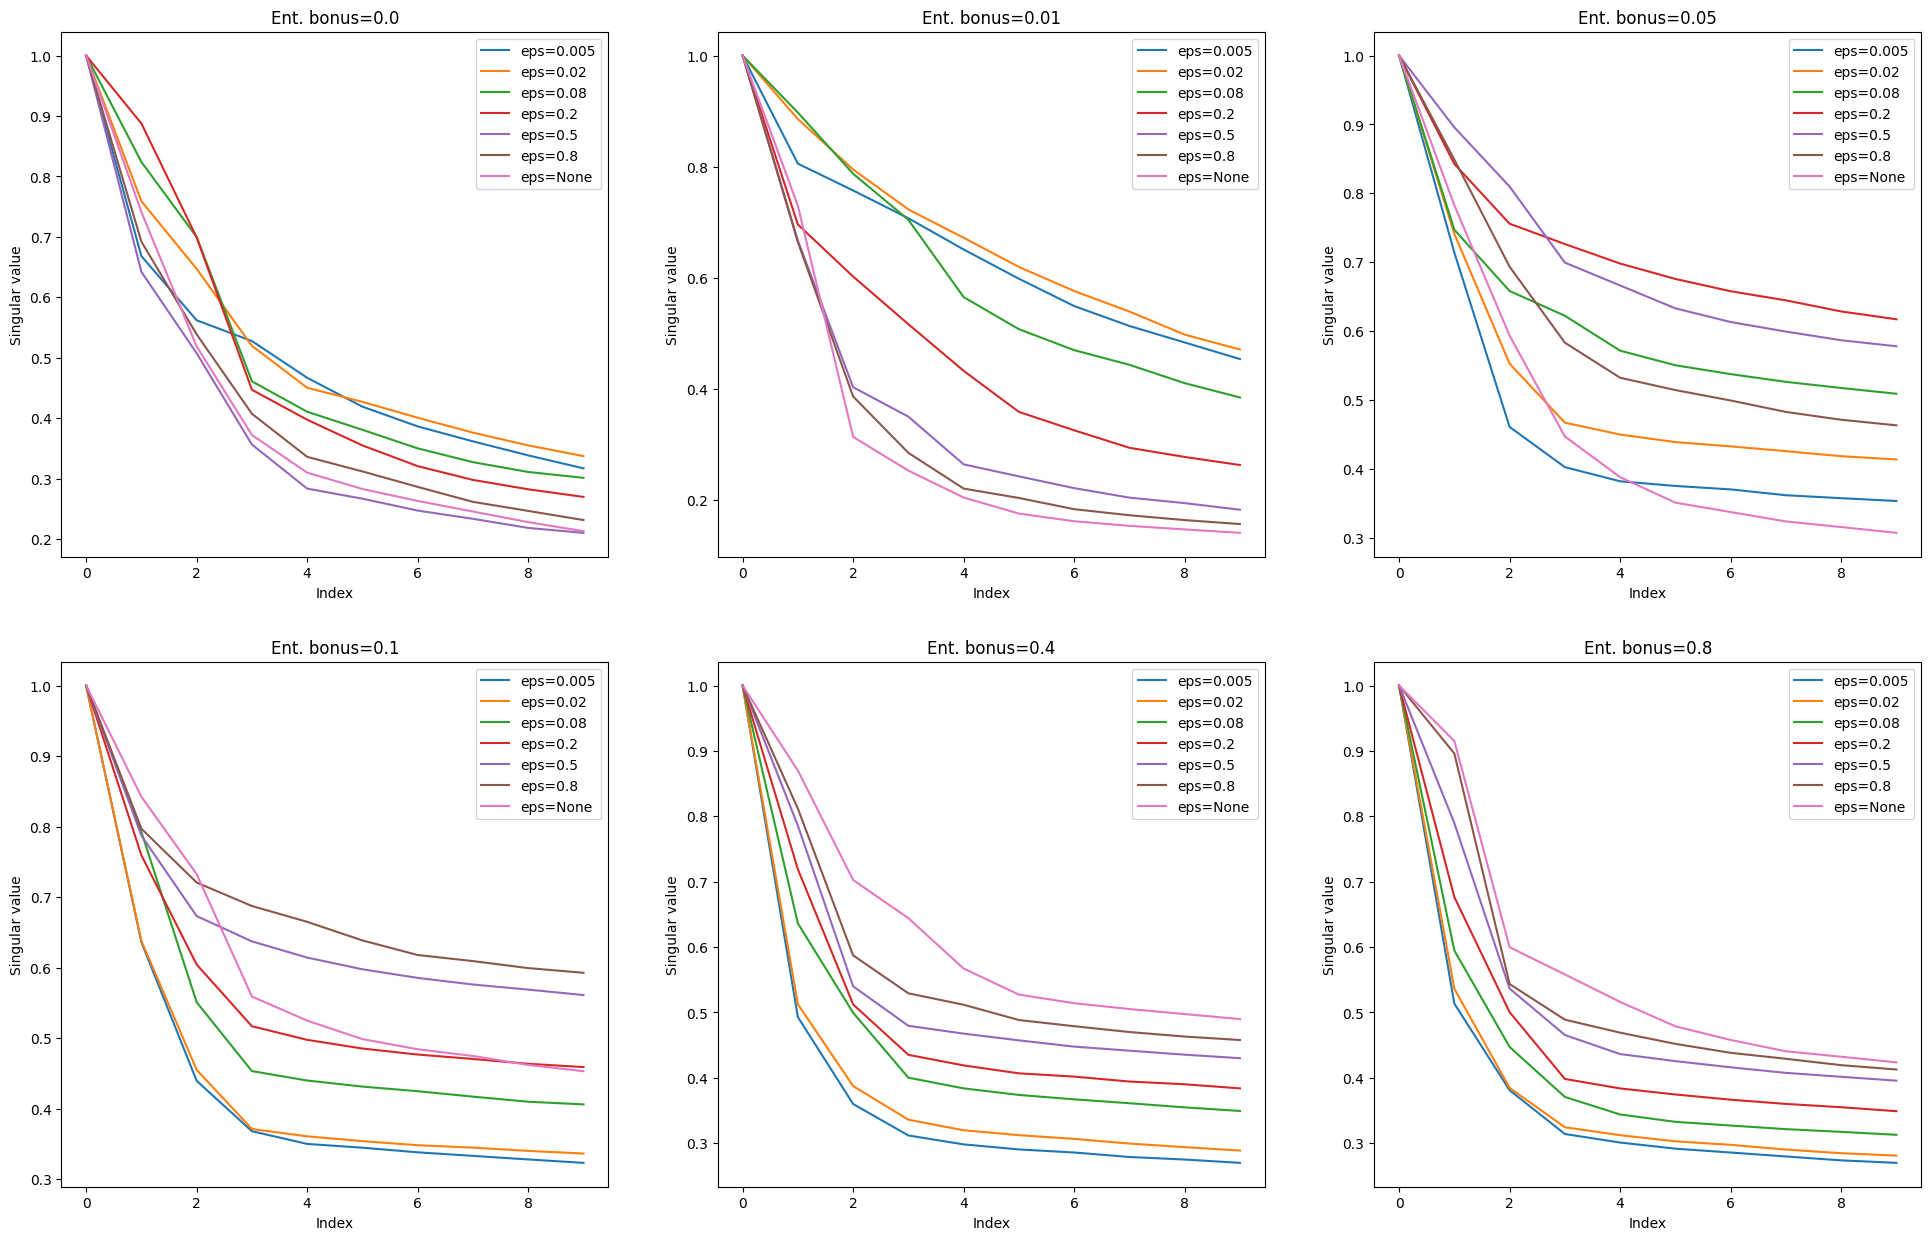

In [8]:
sWr, sWp = plot_svd("Freeway-MinAtar", ents, clips)

## 6. MountainCar

Wr shape: (8, 6, 7, 64, 64)
Wp shape: (8, 6, 7, 64, 3)
sWr shape: (8, 6, 7, 64)
sWp shape: (8, 6, 7, 3)
Max sWr: 87.20444
Max sWp: 13.6229725

Singular values of representation weight matrix


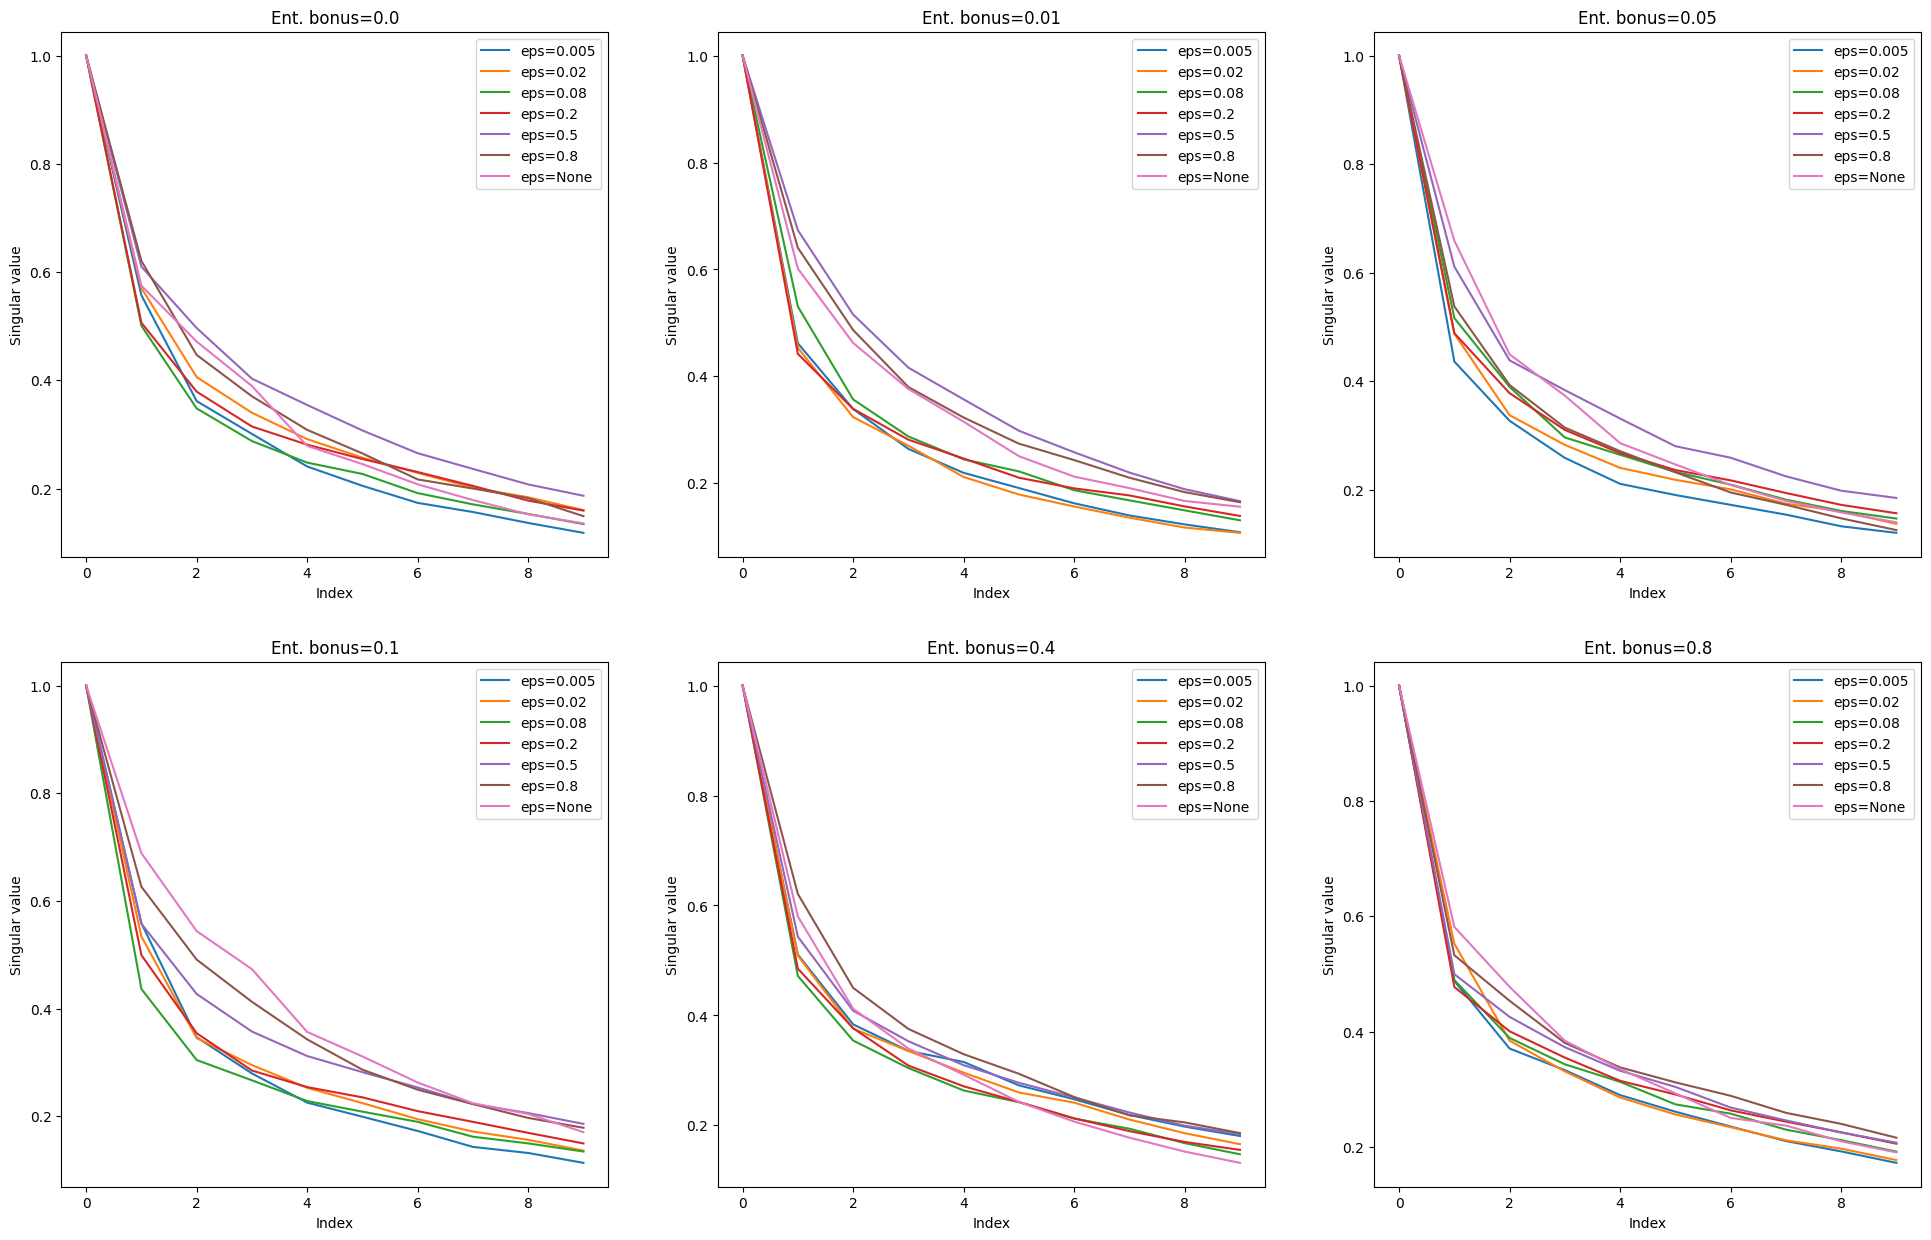

In [9]:
sWr, sWp = plot_svd("MountainCar-v0", ents, clips)

## 7. SpaceInvaders

Wr shape: (8, 6, 7, 256, 256)
Wp shape: (8, 6, 7, 256, 4)
sWr shape: (8, 6, 7, 256)
sWp shape: (8, 6, 7, 4)
Max sWr: 36.511353
Max sWp: 7.4727306

Singular values of representation weight matrix


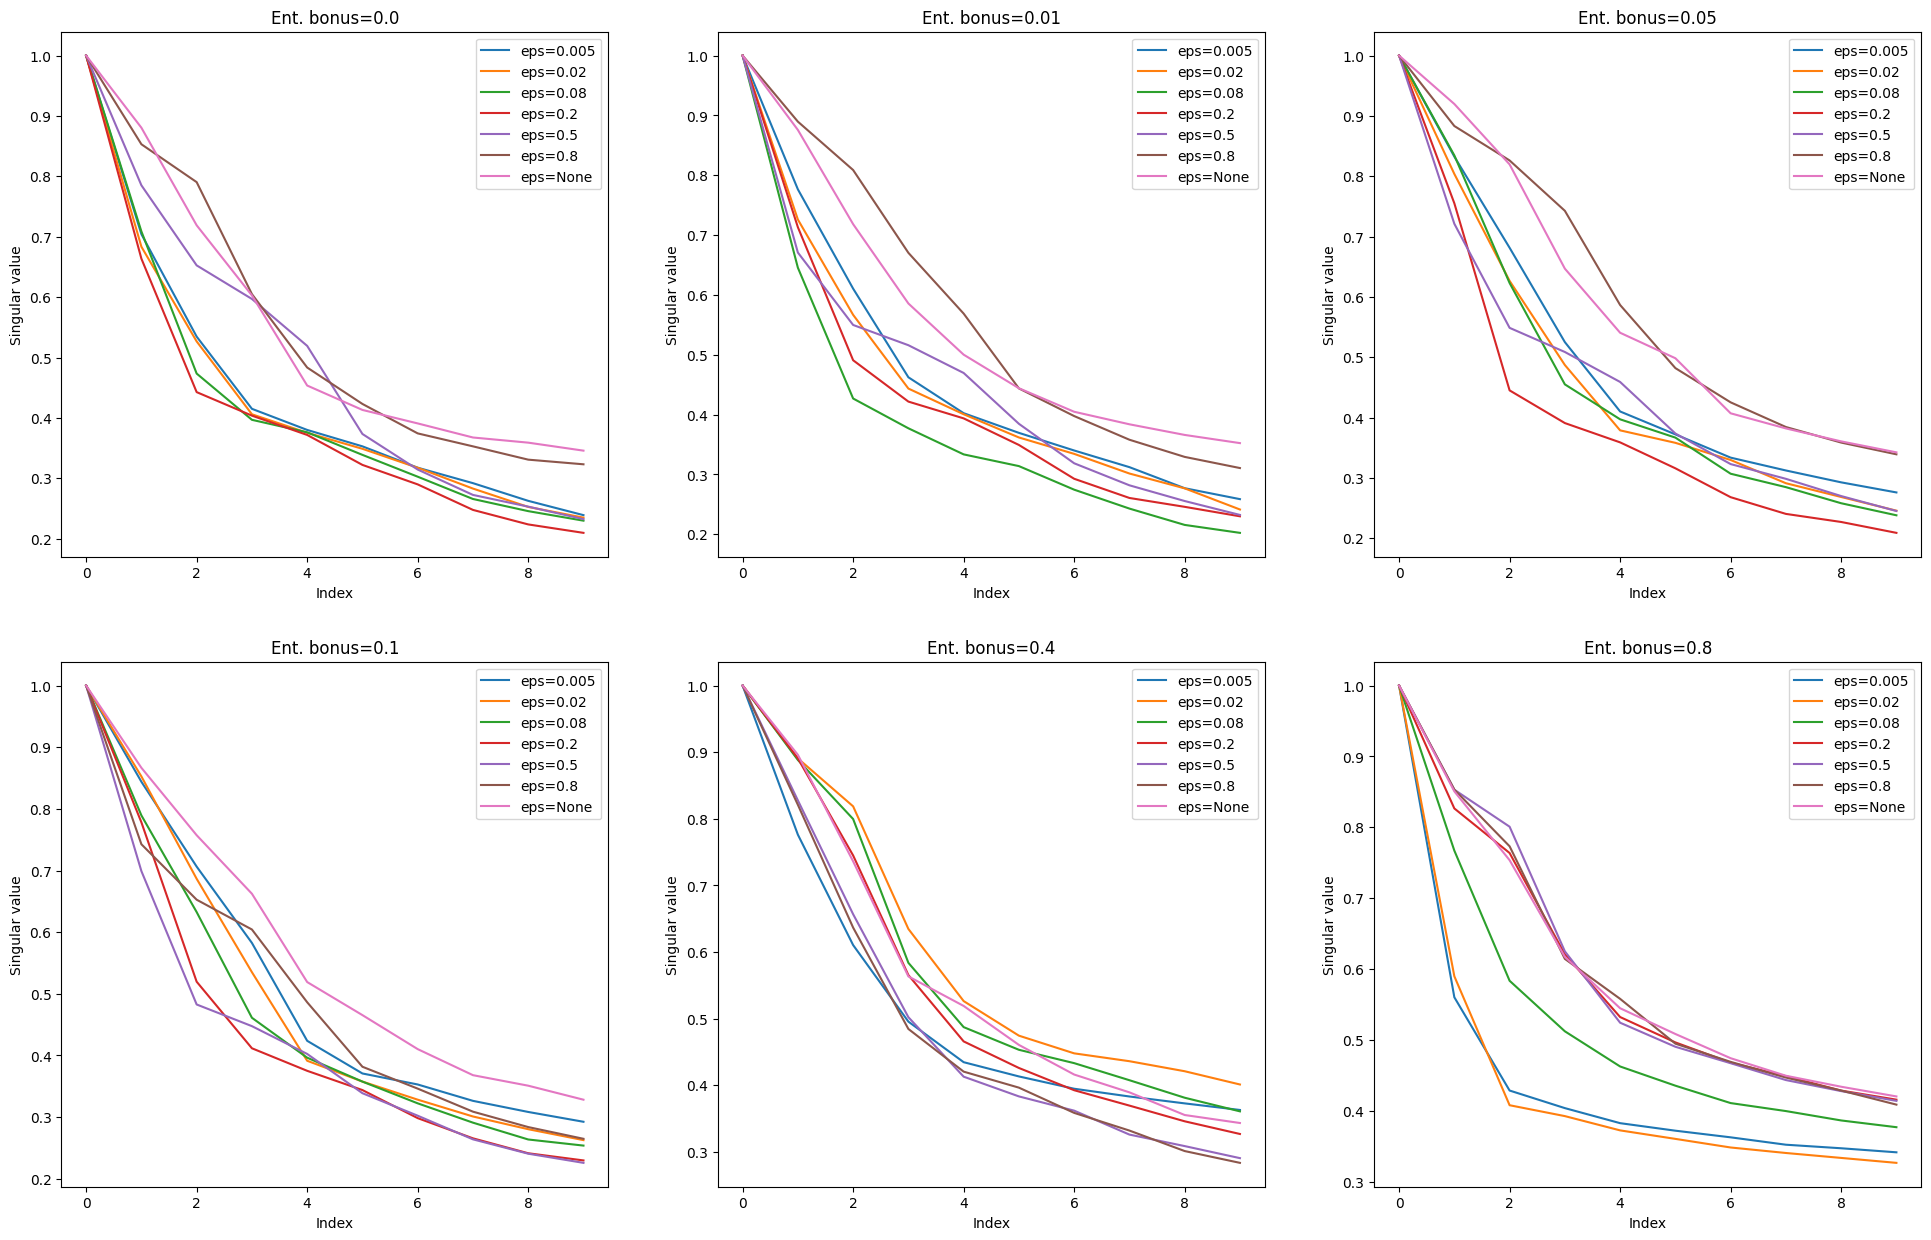

In [10]:
sWr, sWp = plot_svd("SpaceInvaders-MinAtar", ents, clips)